### Lab1

In [7]:
import pandas as pd
sHT = pd.Series(["Hồ Lê Quyên", "Nguyễn Hải Hồ", "Hoa Thanh Tùng"])
sCC = pd.Series([9, 7, 8])
sGK = pd.Series([8, 6], index = [0,2])
sCK = pd.Series([7, 8], index = [1, 2])
duLieu = {"Họ và tên":sHT, "Chuyên cần": sCC, "Giữa kỳ": sGK, "Cuối kỳ":
sCK}
df = pd.DataFrame(duLieu)
df

,Họ và tên,Chuyên cần,Giữa kỳ,Cuối kỳ
0,Hồ Lê Quyên,9,8.0,NaN
1,Nguyễn Hải Hồ,7,NaN,7.0
2,Hoa Thanh Tùng,8,6.0,8.0


In [5]:
import pandas as pd
duLieu = {
    "Ngày": ["1/3", "2/3", "3/3", "4/3", "5/3", "6/3", "7/3"],
    "Giá vàng bán ra": [46, 47, 46, 45, 46, 46, 45],
    "Giá vàng mua vào": [45, 46, 45.5, 44.5, 45, 45.5, 44.5]
}
df = pd.DataFrame(duLieu)
df


,Ngày,Giá vàng bán ra,Giá vàng mua vào
0,1/3,46,45.0
1,2/3,47,46.0
2,3/3,46,45.5
3,4/3,45,44.5
4,5/3,46,45.0
5,6/3,46,45.5
6,7/3,45,44.5


In [9]:
%pip install openpyxl

import pandas as pd
import os
duLieu = {
    "Tên sinh viên": ["Trung", "Cảnh", "Bảo", "Quốc", "Tùng"],
    "Vắng lý thuyết": [3, 5, 1, 0, 2],
    "Vắng thực hành": [2, 1, 0, 0, 1],
    "Không nộp bài": [0, 3, 0, 2, 1]
}
df = pd.DataFrame(duLieu)

file_name = "vi_pham_sinh_vien.xlsx"

df.to_excel(file_name, index=False, engine="openpyxl")

os.system(f"code {file_name}")

print(df)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
  Tên sinh viên  Vắng lý thuyết  Vắng thực hành  Không nộp bài
0         Trung               3               2              0
1          Cảnh               5               1              3
2           Bảo               1               0              0
3          Quốc               0               0              2
4          Tùng               2               1              1


In [10]:
import pandas as pd
import os

file_name = "vi_pham_sinh_vien.xlsx"

if not os.path.exists(file_name):
    print(f"File '{file_name}' không tồn tại. Hãy chạy bài 2 trước!")
else:

    df = pd.read_excel(file_name, engine="openpyxl")

    khong_nop_bai = df[df["Không nộp bài"] > 0]

    vang_ca_hai = df[(df["Vắng lý thuyết"] > 0) & (df["Vắng thực hành"] > 0)]

    print("\nSinh viên không nộp bài:")
    print(khong_nop_bai)

    print("\nSinh viên vắng cả lý thuyết và thực hành:")
    print(vang_ca_hai)



Sinh viên không nộp bài:
  Tên sinh viên  Vắng lý thuyết  Vắng thực hành  Không nộp bài
1          Cảnh               5               1              3
3          Quốc               0               0              2
4          Tùng               2               1              1

Sinh viên vắng cả lý thuyết và thực hành:
  Tên sinh viên  Vắng lý thuyết  Vắng thực hành  Không nộp bài
0         Trung               3               2              0
1          Cảnh               5               1              3
4          Tùng               2               1              1


### Lab 2-3

    ENO   Age Dept  Gender Skill  WorkingYear  Salary  TrainedYear  \
0  E001  29.0   HR  Female   SQL          3.0     825          3.0   
1  E002  39.0   IT    Male  Java          7.0    1450          7.0   
2  E003   NaN   IT    Male   SQL          6.0    1236          NaN   
3  E004  38.0   HR  Female    C#          6.0    1324          5.0   
4  E005  28.0   IT    Male     R          2.0     895          3.0   

  OverseaProject  
0             No  
1            Yes  
2            Yes  
3             No  
4             No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ENO             46 non-null     object 
 1   Age             44 non-null     float64
 2   Dept            44 non-null     object 
 3   Gender          45 non-null     object 
 4   Skill           46 non-null     object 
 5   WorkingYear     45 non-null     float64
 6 

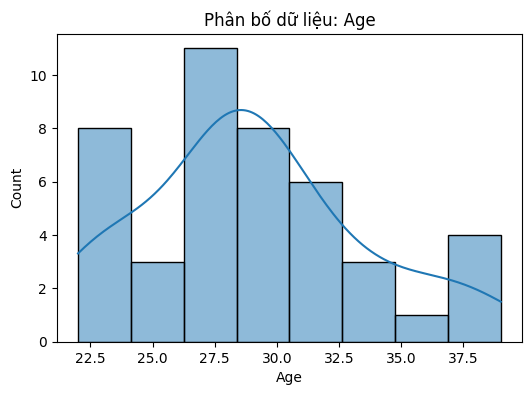

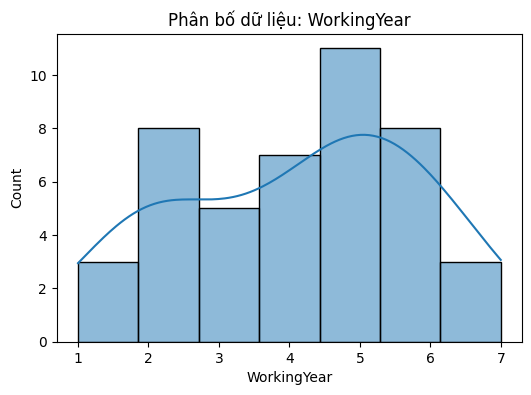

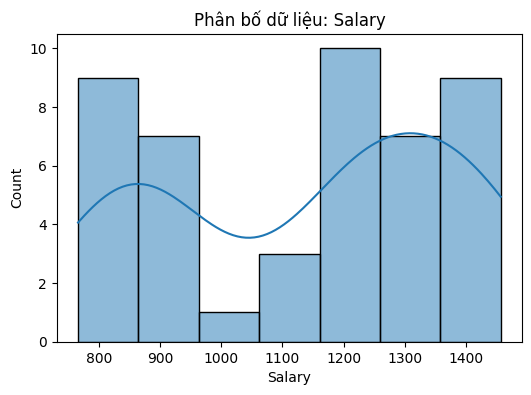

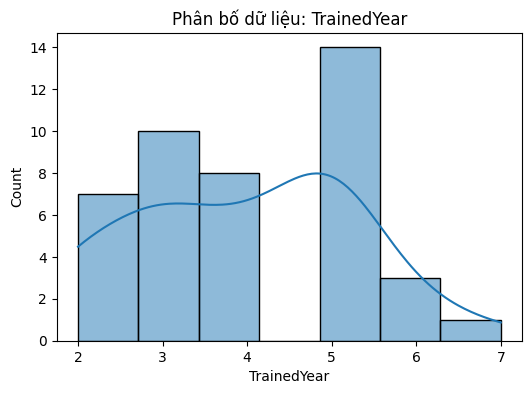

               Salary  WorkingYear       Age
Salary       1.000000     0.566201  0.428102
WorkingYear  0.566201     1.000000  0.787217
Age          0.428102     0.787217  1.000000
               Salary  TrainedYear  WorkingYear       Age
Salary       1.000000     0.910077     0.566201  0.428102
TrainedYear  0.910077     1.000000     0.469764  0.397530
WorkingYear  0.566201     0.469764     1.000000  0.787217
Age          0.428102     0.397530     0.787217  1.000000


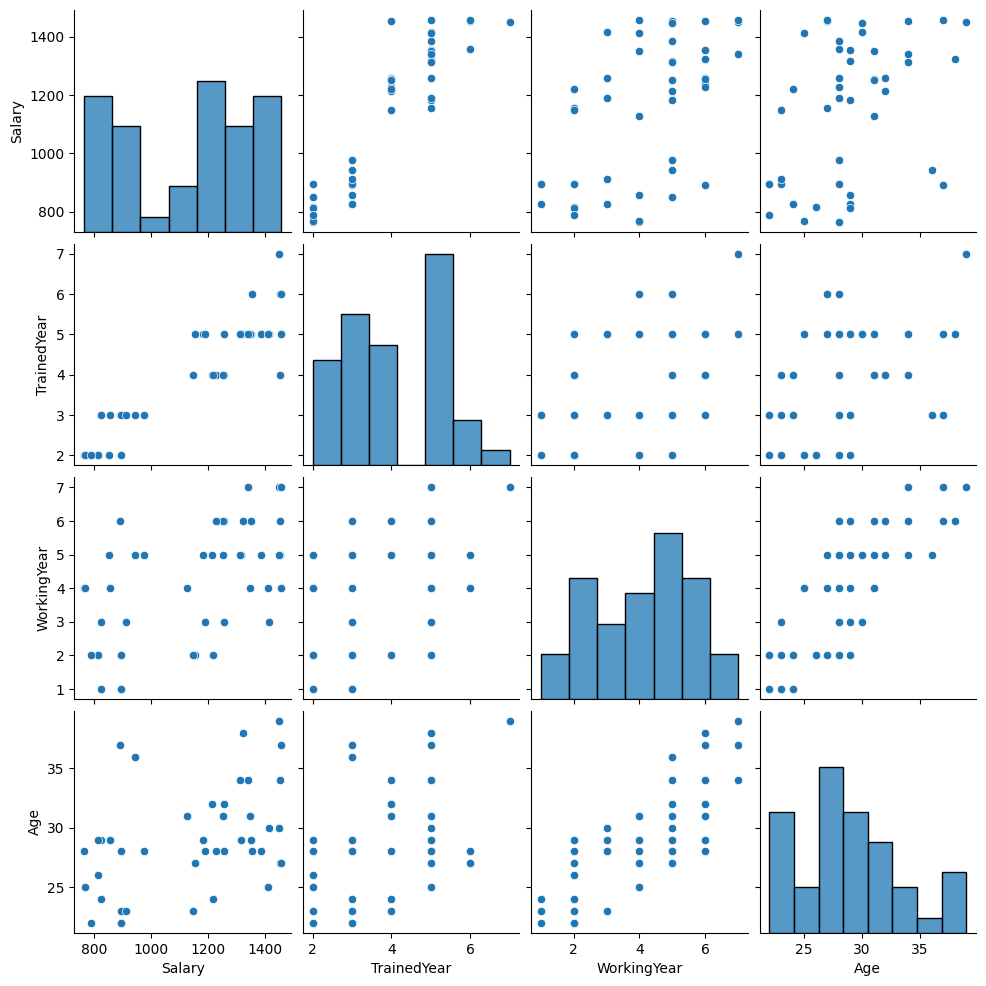

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
data = pd.read_excel('C:/Users/thais/Downloads/JOB_INFO.xlsx')

# 2. Hiển thị dữ liệu
print(data.head())       # Hiển thị 5 dòng đầu
print(data.info())       # Thông tin về cột, kiểu dữ liệu, missing

# 3. Thống kê dữ liệu
# a. Tổng số bản ghi
total_records = len(data)

# b. Thống kê mô tả các cột số
description_numerical = data.describe(include=[np.number])
print(description_numerical)

# c. Thống kê mô tả cho cột định tính
print(data.describe(include=[object]))

# d. Thống kê số lượng và % của các cột phân loại
category_stats = data[['Dept', 'Gender', 'Skill', 'OverseaProject']].value_counts().rename_axis(['Dept', 'Gender', 'Skill', 'OverseaProject']).reset_index(name='Count')
category_stats['Percentage'] = (category_stats['Count'] / total_records) * 100
print(category_stats)

# e. Thống kê giá trị thiếu
print(data.isnull().sum())

# f. Thống kê theo phòng ban
dept_counts = data['Dept'].value_counts()
print(dept_counts)

# g. Thống kê theo giới tính
gender_counts = data['Gender'].value_counts()
print(gender_counts)

# h. Thống kê theo kỹ năng
skill_counts = data['Skill'].value_counts()
print(skill_counts)

# i. Thống kê người tham gia dự án quốc tế
project_counts = data['OverseaProject'].value_counts()
print(project_counts)

# 4. Biểu đồ
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Phân bố dữ liệu: {column}')
    plt.show()

# 5. Tương quan Salary với WorkingYear, Age
print(data[['Salary', 'WorkingYear', 'Age']].corr())

# 6. Tương quan Salary, TrainedYear, WorkingYear, Age
print(data[['Salary', 'TrainedYear', 'WorkingYear', 'Age']].corr())

# Biểu đồ tương quan
sns.pairplot(data[['Salary', 'TrainedYear', 'WorkingYear', 'Age']])
plt.show()


Trung bình:
Toan    4.884162
Van     5.443449
Anh     3.933543
dtype: float64
Độ lệch chuẩn:
Toan    1.440636
Van     1.447770
Anh     1.567942
dtype: float64
Trung vị:
Toan    5.0
Van     5.5
Anh     3.6
dtype: float64
Giá trị thường xuyên:
Toan    5.4
Van     6.0
Anh     3.0
Name: 0, dtype: float64
Tứ vị phân:
      Toan  Van  Anh
0.25   3.8  4.5  2.8
0.50   5.0  5.5  3.6
0.75   6.0  6.5  4.6
Thống kê theo Ten Tinh:
                      Toan       Van       Anh
Ten Tinh                                      
 BInh Duong       5.178798  5.644745  4.462888
 BInh Thuan       4.985884  6.054283  4.014224
 Ba Ria Vung Tau  5.268633  5.048650  4.451301
 Bac Giang        4.676841  5.620116  3.702469
 Bac Kan          3.933946  5.820039  3.158669
 Bac Lieu         4.947216  6.200237  3.849484
 Bac Ninh         5.010832  5.348718  3.831707
 Ben Tre          5.020316  5.299480  3.927443
 Binh Dinh        4.918991  5.184650  3.814188
 Binh Phuoc       4.952554  5.227164  3.778599
 Ca Mau       

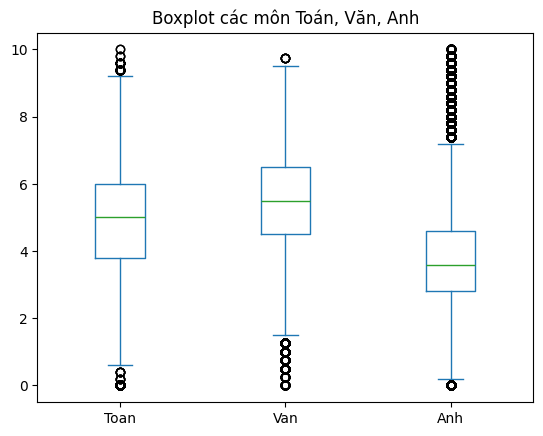

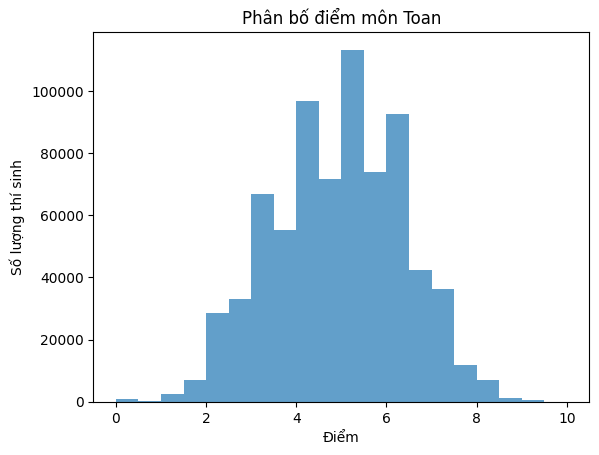

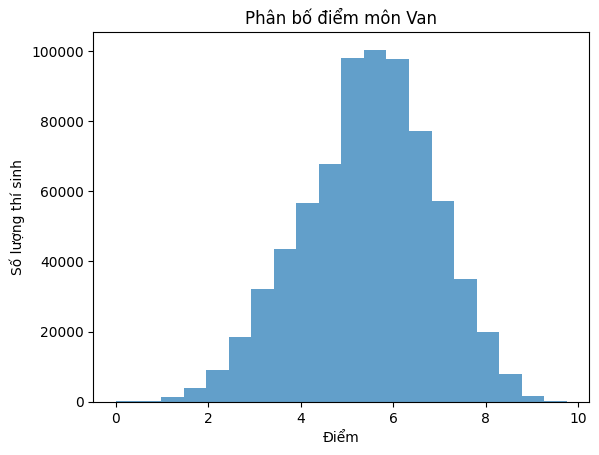

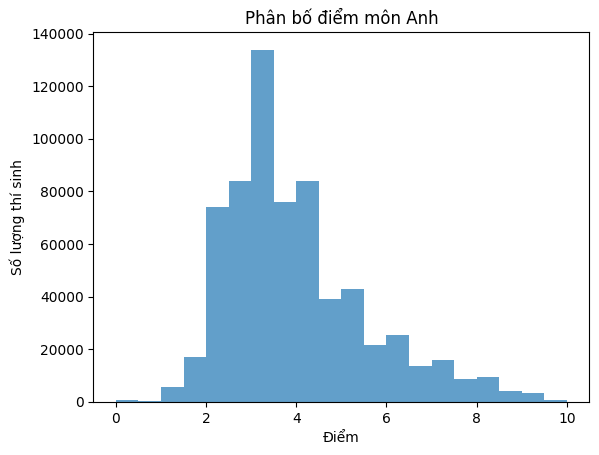

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv('C:/Users/thais/Downloads/ThiTHPT2018.csv', low_memory=False)

# 2. Trung bình các môn
print("Trung bình:")
print(df[['Toan', 'Van', 'Anh']].mean())

# 3. Độ lệch chuẩn và trung vị
print("Độ lệch chuẩn:")
print(df[['Toan', 'Van', 'Anh']].std())

print("Trung vị:")
print(df[['Toan', 'Van', 'Anh']].median())

# 4. Giá trị thường xuyên (mode)
print("Giá trị thường xuyên:")
print(df[['Toan', 'Van', 'Anh']].mode().iloc[0])

# 5. Tứ vị phân (quartiles)
print("Tứ vị phân:")
print(df[['Toan', 'Van', 'Anh']].quantile([0.25, 0.5, 0.75]))

# 6. Thống kê theo tỉnh
print("Thống kê theo Ten Tinh:")
print(df.groupby('Ten Tinh')[['Toan', 'Van', 'Anh']].mean())

# 7. Vẽ biểu đồ — Tất cả môn trên 1 biểu đồ
df[['Toan', 'Van', 'Anh']].plot(kind='box', title='Boxplot các môn Toán, Văn, Anh')
plt.show()

# Vẽ biểu đồ riêng cho từng môn
for mon in ['Toan', 'Van', 'Anh']:
    df[mon].plot(kind='hist', bins=20, alpha=0.7, title=f'Phân bố điểm môn {mon}')
    plt.xlabel('Điểm')
    plt.ylabel('Số lượng thí sinh')
    plt.show()


### Lab 4-5

In [21]:
import pandas as pd

# 1. Đọc file dữ liệu
df = pd.read_excel('C:/Users/thais/Downloads/JOB_INFO.xlsx')

# 2. Hiển thị dữ liệu
print(df.head())

# 3. Hiển thị giá trị null cho từng trường
print(df.isnull().sum())

# 4. Hiển thị tất cả dòng có giá trị thiếu
print(df[df.isnull().any(axis=1)])

# 5. Hiển thị các trường có giá trị null và số lượng
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

# 6. Xóa những dòng có giá trị null
df_no_nulls = df.dropna()
df_no_nulls.to_csv("JOB_INFO_no_nulls.csv", index=False)

# 7. Thay thế giá trị thiếu của 'Age' bằng giá trị trung bình
df['Age'] = df['Age'].fillna(df['Age'].mean())

# ✍️ Tự làm:
# - Thay thế giá trị thiếu của Gender và Skill bằng mode (giá trị phổ biến)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Skill'] = df['Skill'].fillna(df['Skill'].mode()[0])

# - Thay giá trị thiếu của Dept bằng "Khongbiet"
df['Dept'] = df['Dept'].fillna('Khongbiet')

# - Ghi lại file

df.to_csv(r"C:\Users\thais\Downloads\Dlht.csv", index=False)


    ENO   Age Dept  Gender Skill  WorkingYear  Salary  TrainedYear  \
0  E001  29.0   HR  Female   SQL          3.0     825          3.0   
1  E002  39.0   IT    Male  Java          7.0    1450          7.0   
2  E003   NaN   IT    Male   SQL          6.0    1236          NaN   
3  E004  38.0   HR  Female    C#          6.0    1324          5.0   
4  E005  28.0   IT    Male     R          2.0     895          3.0   

  OverseaProject  
0             No  
1            Yes  
2            Yes  
3             No  
4             No  
ENO               0
Age               2
Dept              2
Gender            1
Skill             0
WorkingYear       1
Salary            0
TrainedYear       3
OverseaProject    0
dtype: int64
     ENO   Age Dept  Gender Skill  WorkingYear  Salary  TrainedYear  \
2   E003   NaN   IT    Male   SQL          6.0    1236          NaN   
6   E007  27.0  NaN    Male   SQL          2.0    1154          5.0   
7   E008  28.0   MA  Female     R          NaN    1356     